# Souce: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

LOGISTIC REGRESSION - HEART DISEASE PREDICTION

Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
• Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
Logistic Regression
Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.
The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elimination approach is used here to remove those attributes with highest P-value one at a time followed by running the regression repeatedly until all attributes have P Values less than 0.05.
Feature Selection: Backward elimination (P-value approach)
Logistic regression equation
P=eβ0+β1X1/1+eβ0+β1X1P=eβ0+β1X1/1+eβ0+β1X1
When all features plugged in:
logit(p)=log(p/(1−p))=β0+β1∗Sexmale+β2∗age+β3∗cigsPerDay+β4∗totChol+β5∗sysBP+β6∗glucoselogit(p)=log(p/(1−p))=β0+β1∗Sexmale+β2∗age+β3∗cigsPerDay+β4∗totChol+β5∗sysBP+β6∗glucose

Interpreting the results: Odds Ratio, Confidence Intervals and P-values
• This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (sex_male = 1)over that of females (sex_male = 0) is exp(0.5815) = 1.788687. In terms of percent change, we can say that the odds for males are 78.8% higher than the odds for females.
• The coefficient for age says that, holding all others constant, we will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0655) = 1.067644.
• Similarly , with every extra cigarette one smokes thers is a 2% increase in the odds of CDH.
• For Total cholesterol level and glucose level there is no significant change.

• There is a 1.7% increase in odds for every unit increase in systolic Blood Pressure.

Model Evaluation - Statistics
From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.
Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5
lower the threshold
Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actually is one) is more dangerous than a False Positive in this case. Hence in order to increase the sensitivity, threshold can be lowered.

Conclusions
• All attributes selected after the elimination process show P-values lower than 5% and thereby suggesting significant role in the Heart disease prediction.

• Men seem to be more susceptible to heart disease than women. Increase in age, number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease

• Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading. Glucose too causes a very negligible change in odds (0.2%)

• The model predicted with 0.88 accuracy. The model is more specific than sensitive. Overall model could be improved with more data

Appendix
http://www.who.int/mediacentre/factsheets/fs317/en/
Data Source References
https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data

## Objective: With Linear Regression verify the chance of the paciente to have coronary heart disease (CHD) in ten years.

# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Load Dataset

In [2]:
df = pd.read_csv('framingham.csv', sep=',')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# Check DF format
df.shape

(4238, 16)

# Target Analyses

In [5]:
# Check for non-target nulls
df['TenYearCHD'].isnull().sum() 

0

In [6]:
# Verify opctions
df['TenYearCHD'].unique() 

array([0, 1], dtype=int64)

In [7]:
# between CHD
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

# Features Analyses

In [ ]:
df.dtypes 

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
df = df.fillna(df.mean(numeric_only=True))

In [11]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
df.describe() 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [13]:
corr = df.select_dtypes('number').corr() 
corr

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017126,0.197596,0.316807,-0.052204,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.163613,-0.213748,-0.192366,0.121980,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
education,0.017126,-0.163613,1.000000,0.018301,0.007962,-0.010607,-0.035110,-0.080993,-0.038146,-0.022507,-0.128260,-0.061755,-0.135635,-0.053626,-0.033721,-0.053384
currentSmoker,0.197596,-0.213748,0.018301,1.000000,0.766970,-0.048632,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.316807,-0.192366,0.007962,0.766970,1.000000,-0.045826,-0.032706,-0.065947,-0.037063,-0.026025,-0.088505,-0.056391,-0.092453,0.074851,-0.056088,0.057775
BPMeds,-0.052204,0.121980,-0.010607,-0.048632,-0.045826,1.000000,0.115003,0.259243,0.051571,0.078909,0.252047,0.192490,0.099552,0.015175,0.048905,0.086774
prevalentStroke,-0.004546,0.057655,-0.035110,-0.032988,-0.032706,0.115003,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.080993,-0.103260,-0.065947,0.259243,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.038146,-0.044295,-0.037063,0.051571,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.260270,-0.022507,-0.046285,-0.026025,0.078909,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624


<Axes: >

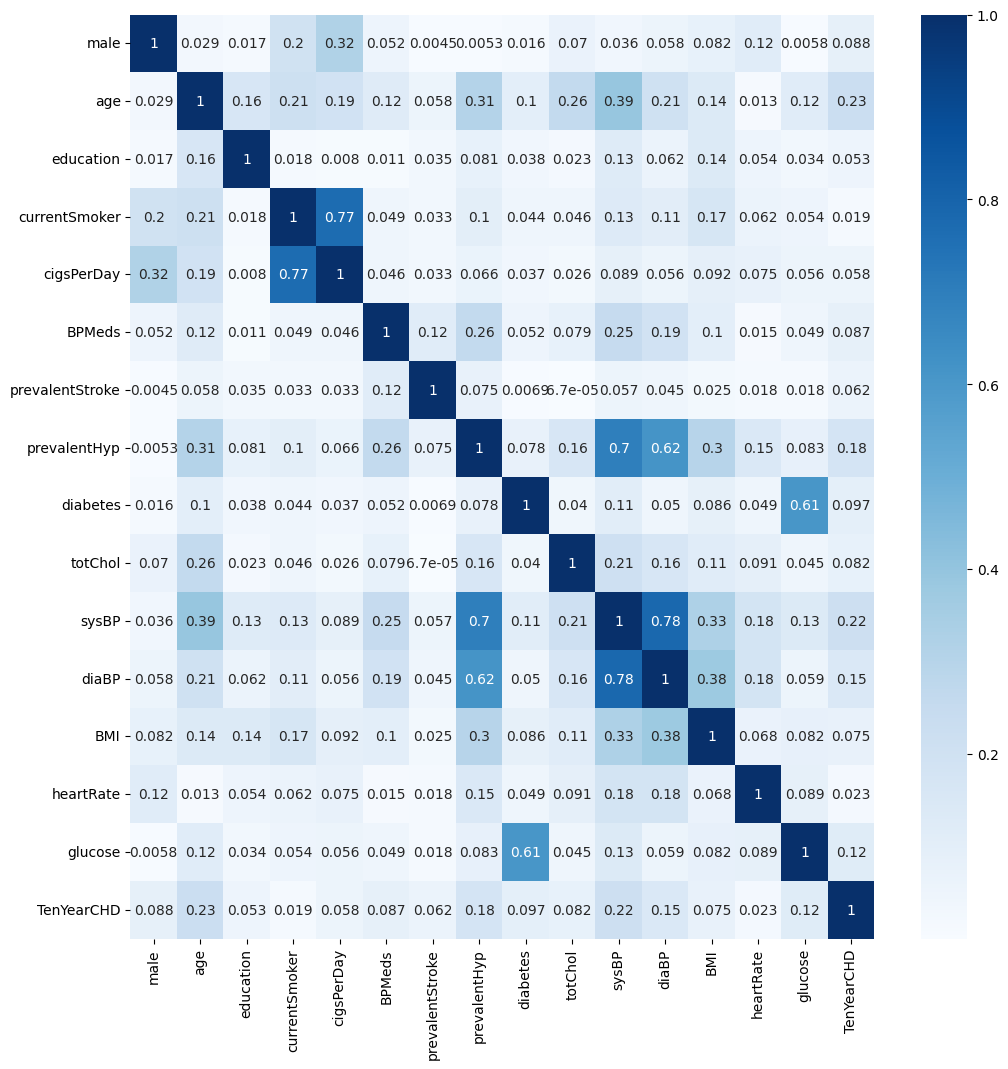

In [14]:
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(corr.abs(), cmap='Blues', annot=True) #ou sns.heatmap(corr, cmap='Blues', annot=True)  


In [15]:
y = df['TenYearCHD']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

# Prepare features and Target

In [16]:
X = df.drop('TenYearCHD', axis=1)

X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [17]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [18]:
# check how the distribution was
print(f'Features X_train: {X_train.shape}')
print(f'Features X_test: {X_test.shape}')
print(f'Features y_train: {y_train.shape}')
print(f'Features y_test: {y_test.shape}')

Features X_train: (3390, 15)
Features X_test: (848, 15)
Features y_train: (3390,)
Features y_test: (848,)


In [19]:
# normalize numerical data X_train and X_test
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.210526,1.000000,1.0,0.500000,0.0,0.0,0.0,0.0,0.166384,0.224586,0.358696,0.198740,0.214286,0.132768
1,0.0,0.657895,0.333333,0.0,0.000000,0.0,0.0,1.0,0.0,0.242784,0.326241,0.483696,0.406447,0.306122,0.152542
2,0.0,0.394737,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.208829,0.186761,0.250000,0.277266,0.387755,0.093220
3,1.0,0.236842,0.333333,1.0,0.500000,0.0,0.0,0.0,0.0,0.205433,0.139480,0.375000,0.245516,0.224490,0.084746
4,0.0,0.842105,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.212224,0.312057,0.391304,0.119971,0.234694,0.158192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,0.0,0.105263,0.000000,1.0,0.083333,0.0,0.0,1.0,0.0,0.195246,0.300236,0.500000,0.272661,0.316327,0.087571
3386,0.0,0.657895,0.666667,1.0,0.250000,0.0,0.0,0.0,0.0,0.242784,0.196217,0.282609,0.134270,0.357143,0.090395
3387,0.0,0.736842,0.333333,0.0,0.000000,0.0,0.0,1.0,0.0,0.324278,0.234043,0.445652,0.231459,0.387755,0.115819
3388,1.0,0.184211,0.333333,1.0,0.166667,0.0,0.0,0.0,0.0,0.183362,0.087470,0.179348,0.217159,0.234694,0.062147


In [20]:
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X.columns)
X_test

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.833333,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.219373,0.404389,0.400000,0.360959,0.325581,0.139394
1,1.0,0.333333,0.666667,0.0,0.000000,0.0,0.0,0.0,0.0,0.139601,0.260188,0.388571,0.390068,0.476744,0.130303
2,0.0,0.500000,0.000000,1.0,0.028571,0.0,0.0,0.0,0.0,0.421652,0.272727,0.297143,0.125000,0.360465,0.169697
3,1.0,0.333333,0.666667,1.0,0.428571,0.0,0.0,0.0,0.0,0.390313,0.266458,0.394286,0.414041,0.360465,0.157576
4,0.0,0.333333,0.333333,1.0,0.042857,0.0,0.0,0.0,0.0,0.390313,0.291536,0.285714,0.125000,0.534884,0.139394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,1.0,0.388889,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.415954,0.347962,0.274286,0.436644,0.302326,0.093939
844,1.0,0.305556,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.401709,0.291536,0.285714,0.395890,0.418605,0.103030
845,1.0,0.472222,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.481481,0.269592,0.377143,0.366781,0.476744,0.142424
846,1.0,0.861111,0.666667,0.0,0.000000,0.0,0.0,1.0,1.0,0.233618,0.579937,0.262857,0.284589,0.593023,1.000000


In [21]:
X_train.isnull().values.any()

False

In [22]:
X_train.isnull().sum().sum()

0

In [23]:
# If I hadn't made the null adjustment above
# imputer = SimpleImputer(strategy='mean')  # ou 'median', 'most_frequent', etc.
# X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Linear Regression (ML - Model)# Linear Regression (ML - Model)

In [24]:
model = LogisticRegression(random_state=42)


In [25]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [26]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [27]:
pd.Series(y_pred).value_counts()

0    824
1     24
Name: count, dtype: int64

In [28]:
print(f"Accuracy: {model.score(X_train, y_train)}")

Accuracy: 0.8545722713864307
